#### This algorithm tells us when to buy and when to sell stocks according to moving average cross

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
mglu = pd.read_csv('mglu.csv')
mglu

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 30, 2021",7.80,7.96,8.09,7.60,93.77M,-2.99%
1,"Nov 29, 2021",8.04,8.19,8.47,7.98,85.24M,-0.25%
2,"Nov 26, 2021",8.06,8.48,8.57,8.03,63.46M,-7.36%
3,"Nov 25, 2021",8.70,8.84,9.04,8.61,58.78M,-1.36%
4,"Nov 24, 2021",8.82,8.50,9.01,8.45,79.04M,2.56%
...,...,...,...,...,...,...,...
2590,"Jun 10, 2011",0.49,0.49,0.49,0.48,15.32M,0.00%
2591,"Jun 09, 2011",0.49,0.48,0.50,0.48,38.02M,2.08%
2592,"Jun 08, 2011",0.48,0.48,0.48,0.47,10.76M,0.00%
2593,"Jun 07, 2011",0.48,0.48,0.48,0.47,19.40M,0.00%


In [3]:
df = mglu.sort_index(ascending=False)

In [4]:
data = df.reset_index(drop=True)

In [5]:
data

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jun 06, 2011",0.48,0.48,0.49,0.47,11.21M,0.00%
1,"Jun 07, 2011",0.48,0.48,0.48,0.47,19.40M,0.00%
2,"Jun 08, 2011",0.48,0.48,0.48,0.47,10.76M,0.00%
3,"Jun 09, 2011",0.49,0.48,0.50,0.48,38.02M,2.08%
4,"Jun 10, 2011",0.49,0.49,0.49,0.48,15.32M,0.00%
...,...,...,...,...,...,...,...
2590,"Nov 24, 2021",8.82,8.50,9.01,8.45,79.04M,2.56%
2591,"Nov 25, 2021",8.70,8.84,9.04,8.61,58.78M,-1.36%
2592,"Nov 26, 2021",8.06,8.48,8.57,8.03,63.46M,-7.36%
2593,"Nov 29, 2021",8.04,8.19,8.47,7.98,85.24M,-0.25%


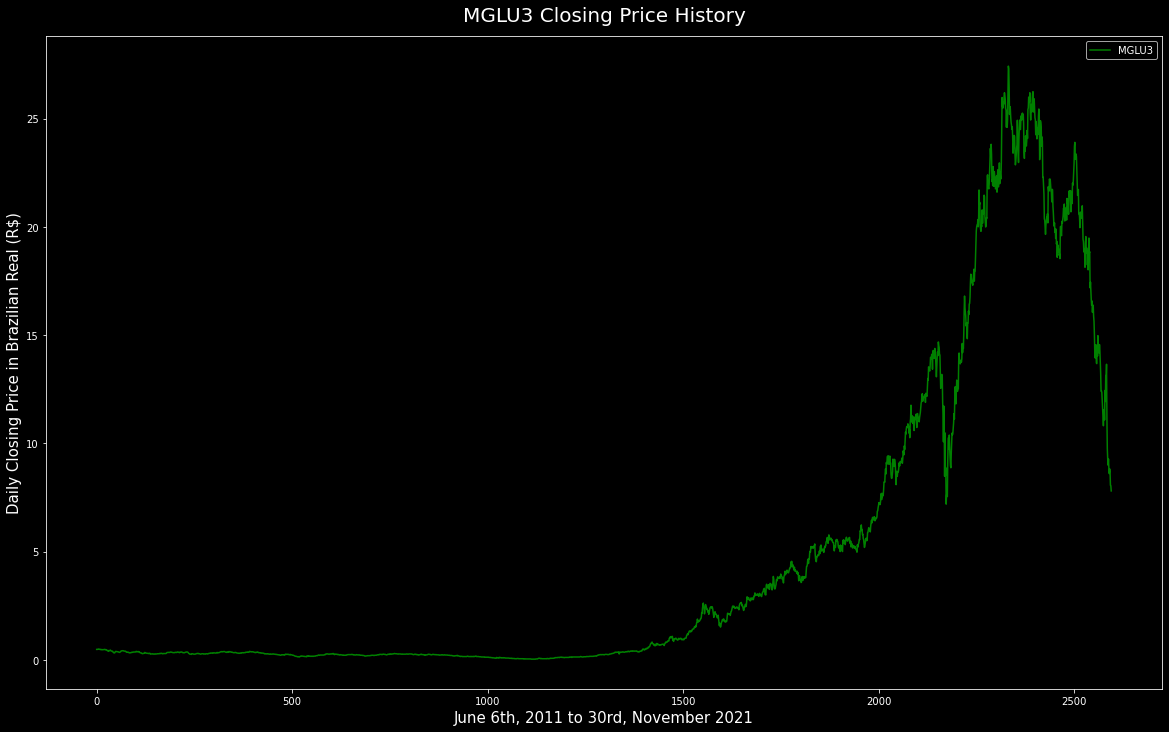

In [6]:
#Visualize Data
plt.figure(figsize=(20,12))
plt.plot(data['Price'], label = 'MGLU3', color = 'green')
plt.title('MGLU3 Closing Price History', fontsize = 20, pad = 15)
plt.xlabel('June 6th, 2011 to 30rd, November 2021', fontsize = 15)
plt.ylabel('Daily Closing Price in Brazilian Real (R$)', fontsize = 15)
plt.legend(loc='best')
plt.show()

In [7]:
# Short SMA creation
SMA30 = pd.DataFrame()
SMA30['Price'] = data['Price'].rolling(window=30).mean()
SMA30

,Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2590,11.812000
2591,11.622667
2592,11.408000
2593,11.203667


In [8]:
# Long SMA creation
SMA100 = pd.DataFrame()
SMA100['Price'] = data['Price'].rolling(window=100).mean()
SMA100

,Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2590,16.9077
2591,16.7878
2592,16.6520
2593,16.5186


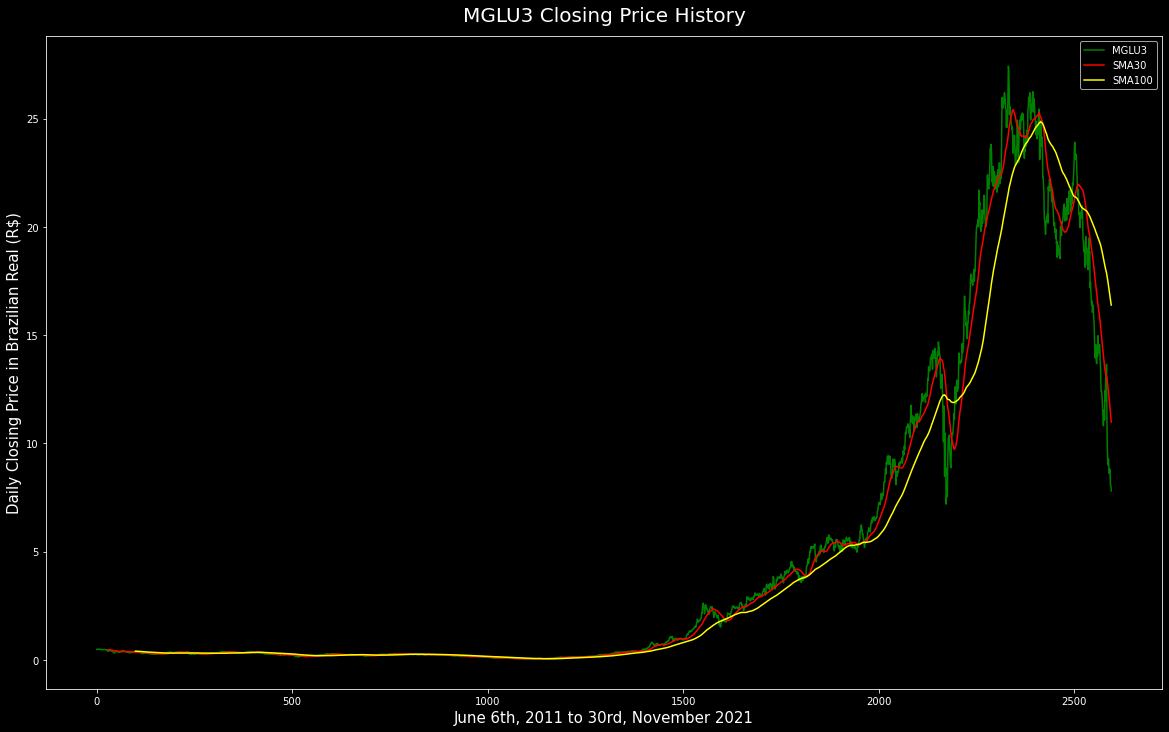

In [9]:
#Visualize price data with SMAs plotted
plt.figure(figsize=(20,12))
plt.plot(data['Price'], label = 'MGLU3', color = 'green')
plt.plot(SMA30['Price'], label ='SMA30', color = 'red')
plt.plot(SMA100['Price'], label ='SMA100', color = 'yellow')
plt.title('MGLU3 Closing Price History', fontsize = 20, pad = 15)
plt.xlabel('June 6th, 2011 to 30rd, November 2021', fontsize = 15)
plt.ylabel('Daily Closing Price in Brazilian Real (R$)', fontsize = 15)
plt.legend(loc='best')
plt.show()

In [10]:
#Create new data frame to store data
new_df = pd.DataFrame()
new_df['MGLU3'] = data['Price']
new_df['SMA30'] = SMA30['Price']
new_df['SMA100'] = SMA100['Price']

In [11]:
new_df

,MGLU3,SMA30,SMA100
0,0.48,NaN,NaN
1,0.48,NaN,NaN
2,0.48,NaN,NaN
3,0.49,NaN,NaN
4,0.49,NaN,NaN
...,...,...,...
2590,8.82,11.812000,16.9077
2591,8.70,11.622667,16.7878
2592,8.06,11.408000,16.6520
2593,8.04,11.203667,16.5186


In [16]:
new_df['Signal'] = 0.0
new_df['Signal'] = np.where(new_df['SMA30'] > new_df['SMA100'], 1.0, 0.0)

In [17]:
new_df

,MGLU3,SMA30,SMA100,Signal
0,0.48,NaN,NaN,0.0
1,0.48,NaN,NaN,0.0
2,0.48,NaN,NaN,0.0
3,0.49,NaN,NaN,0.0
4,0.49,NaN,NaN,0.0
...,...,...,...,...
2590,8.82,11.812000,16.9077,0.0
2591,8.70,11.622667,16.7878,0.0
2592,8.06,11.408000,16.6520,0.0
2593,8.04,11.203667,16.5186,0.0


In [18]:
new_df['Position'] = new_df['Signal'].diff()

In [19]:
new_df

,MGLU3,SMA30,SMA100,Signal,Position
0,0.48,NaN,NaN,0.0,NaN
1,0.48,NaN,NaN,0.0,0.0
2,0.48,NaN,NaN,0.0,0.0
3,0.49,NaN,NaN,0.0,0.0
4,0.49,NaN,NaN,0.0,0.0
...,...,...,...,...,...
2590,8.82,11.812000,16.9077,0.0,0.0
2591,8.70,11.622667,16.7878,0.0,0.0
2592,8.06,11.408000,16.6520,0.0,0.0
2593,8.04,11.203667,16.5186,0.0,0.0


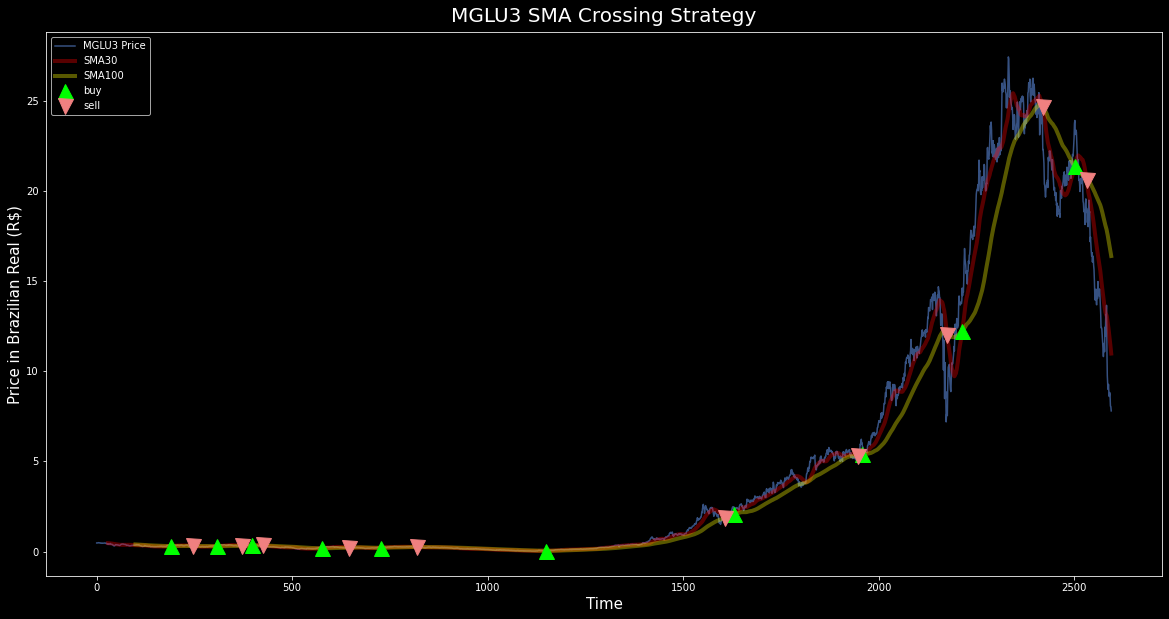

In [39]:
plt.figure(figsize=(20,10))
#plotting close price, short and long SMAs
new_df['MGLU3'].plot(color='cornflowerblue', label = 'MGLU3 Price', alpha = 0.55)
new_df['SMA30'].plot(color='red', label = 'SMA30',alpha = 0.35, linewidth=4.0)
new_df['SMA100'].plot(color='yellow', label = 'SMA100',alpha = 0.35, linewidth=4.0)

#plot 'buy' signals
plt.plot(new_df[new_df['Position'] == 1].index,
        new_df['SMA30'][new_df['Position'] == 1],
        '^', markersize = 15, color = 'lime', label ='buy')

#plot 'sell' signals
plt.plot(new_df[new_df['Position'] == -1].index,
        new_df['SMA30'][new_df['Position'] == -1],
        'v', markersize = 15, color = 'lightcoral', label = 'sell')

plt.ylabel('Price in Brazilian Real (R$)', fontsize = 15)
plt.xlabel('Time', fontsize = 15)
plt.title('MGLU3 SMA Crossing Strategy', fontsize = 20, pad = 10)
plt.legend(loc='upper left')
plt.show()